In [1]:
# Import libraries needed
import functions as ft
import matplotlib.pyplot as plt
import numpy as np

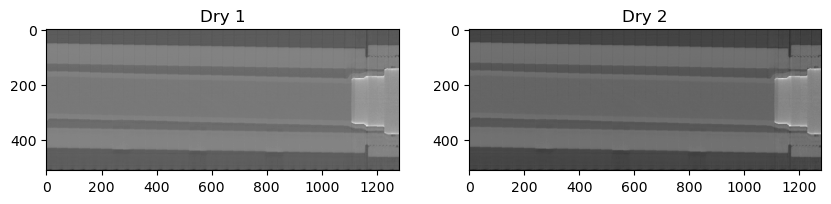

In [2]:
# Compare dry to dry sample
dry_1 = 'C:/Users/ubillusj/Desktop/Almostafa/Experiment_2/Dry_slow_1/'
dry_2 = 'C:/Users/ubillusj/Desktop/Almostafa/Experiment_2/Dry_slow_2/'

# Read dicom files
dry_1_slices = ft.read_dicom(dry_1)
dry_2_slices = ft.read_dicom(dry_2)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(dry_1_slices[256],cmap='gray')
ax[0].set_title('Dry 1')
ax[1].imshow(dry_2_slices[256],cmap='gray')
ax[1].set_title('Dry 2')

plt.show()

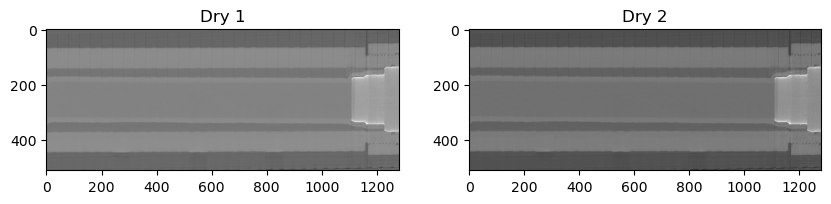

In [3]:
# center images 
center_1, dry_1_aligned = ft.center_itk(dry_1_slices,239,245,264,245)
center_2, dry_2_aligned = ft.center_itk(dry_2_slices,239,245,264,245)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(dry_1_aligned[256],cmap='gray')
ax[0].set_title('Dry 1')
ax[1].imshow(dry_2_aligned[256],cmap='gray')
ax[1].set_title('Dry 2')

plt.show()

(134, 134, 1105) (134, 134, 1105)


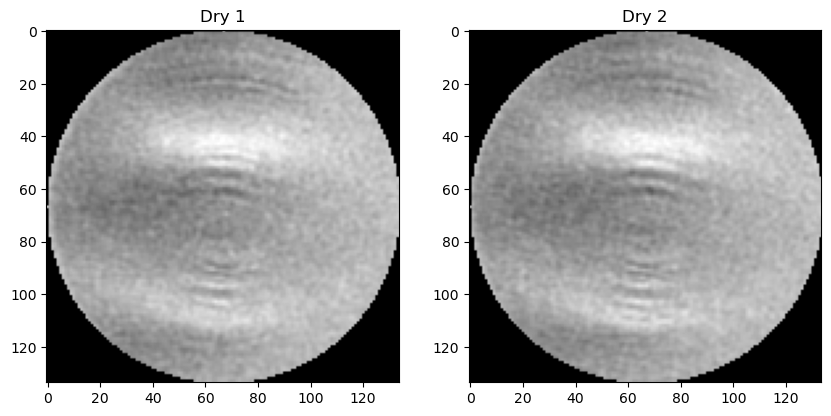

In [5]:
# crop dry images
dry_1_masked = ft.mask_images(dry_1_aligned,256,230,67,1105)
dry_2_masked = ft.mask_images(dry_2_aligned,256,230,67,1105)

print(dry_1_masked.shape,dry_2_masked.shape)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(dry_1_masked[:,:,1000],cmap='gray')
ax[0].set_title('Dry 1')
ax[1].imshow(dry_2_masked[:,:,1000],cmap='gray')
ax[1].set_title('Dry 2')

plt.show()

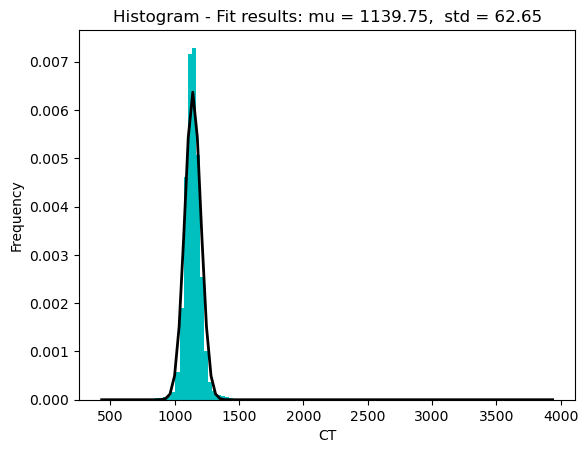

In [6]:
# Histograms for different slices
ft.histograms(dry_2_masked)

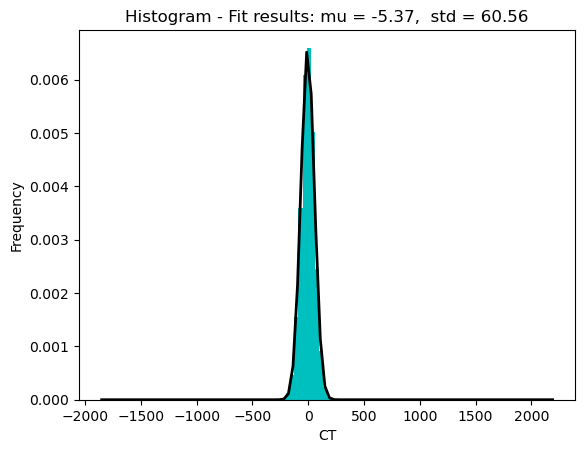

In [7]:
# Difference between dry samples
dry_diff = dry_1_masked - dry_2_masked

# plot histogram
ft.histograms(dry_diff)

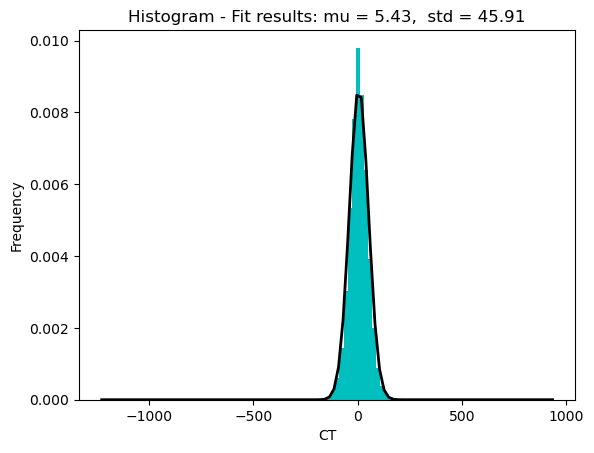

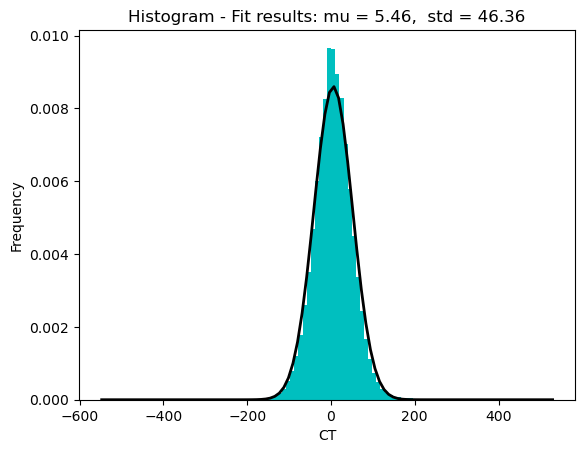

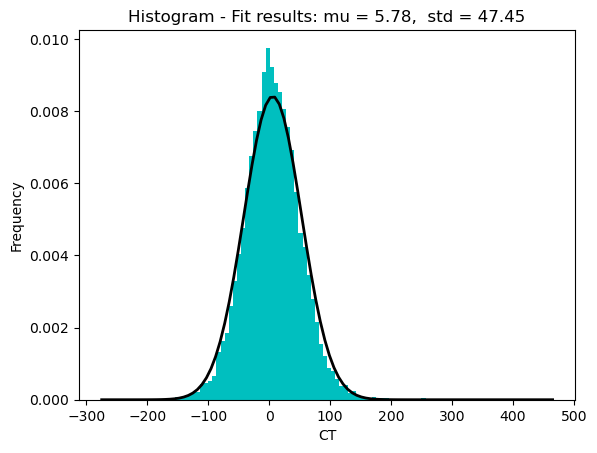

In [11]:
# Resample both dry scans
dry1r075 = ft.resample(dry_1_masked,[0.75,0.75,0.75])
dry1r1 = ft.resample(dry_1_masked,[1,1,1])
dry1r2 = ft.resample(dry_1_masked,[2,2,2])

dry2r075 = ft.resample(dry_2_masked,[0.75,0.75,0.75])
dry2r1 = ft.resample(dry_2_masked,[1,1,1])
dry2r2 = ft.resample(dry_2_masked,[2,2,2])

diffr075 = dry2r075 - dry1r075
diffr1 = dry2r1 - dry1r1
diffr2 = dry2r2 - dry1r2

# plot histograms
ft.histograms(diffr075)
ft.histograms(diffr1)
ft.histograms(diffr2)



In [17]:
# Read tif file
dry = 'C:/Users/ubillusj/Desktop/Almostafa/test/dry/'
wet = 'C:/Users/ubillusj/Desktop/Almostafa/test/wet_reg/'

dry_slices = ft.read_tif(dry,1210)
wet_slices = ft.read_tif(wet,1210)

In [28]:
# Mask images
dry_masked = ft.mask_images(dry_slices, 256,228,67,1068)
wet_masked = ft.mask_images(wet_slices, 256,227,67,1068)

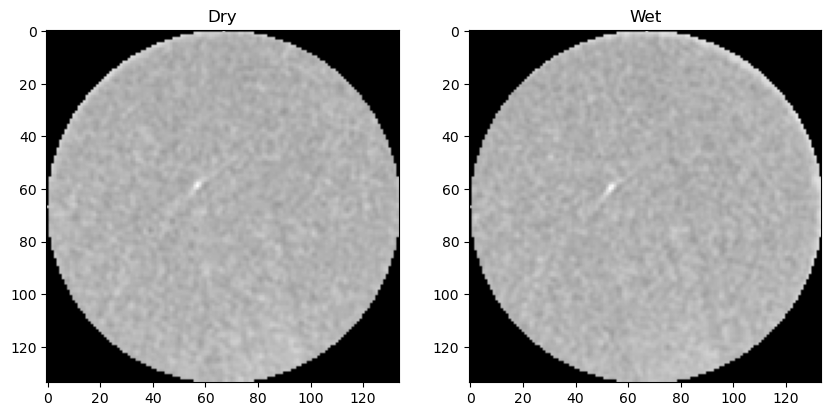

In [29]:
fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(dry_1_masked[:,:,10],cmap='gray')
ax[0].set_title('Dry')
ax[1].imshow(dry_2_masked[:,:,10],cmap='gray')
ax[1].set_title('Wet')

plt.show()

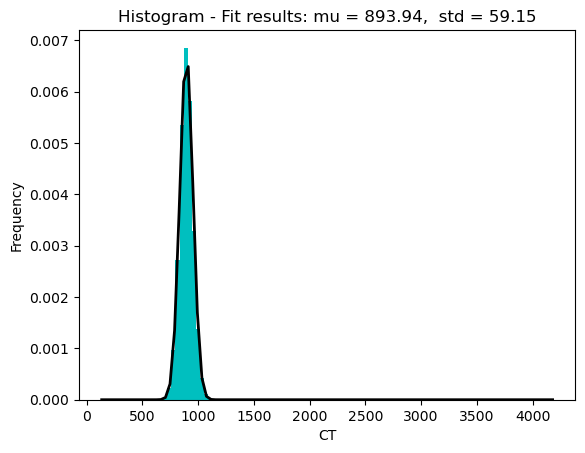

In [35]:
# Compute histograms
ft.histograms(dry_masked)

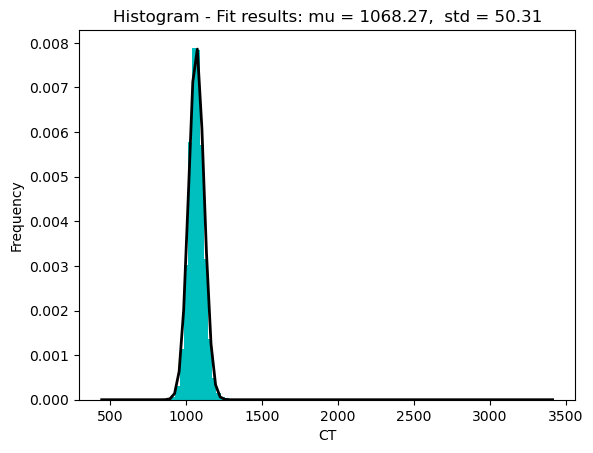

In [36]:
ft.histograms(wet_masked)

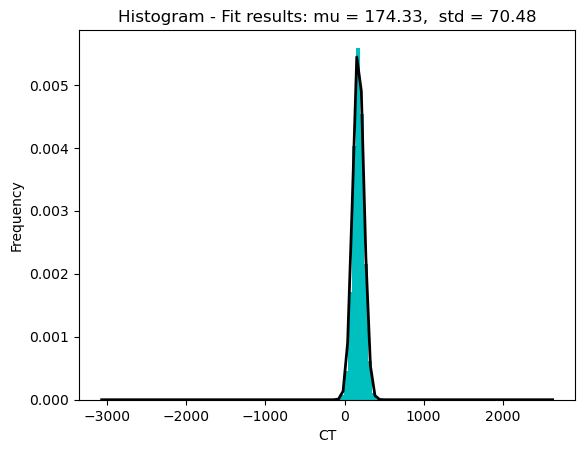

In [37]:
diff = wet_masked - dry_masked
ft.histograms(diff)

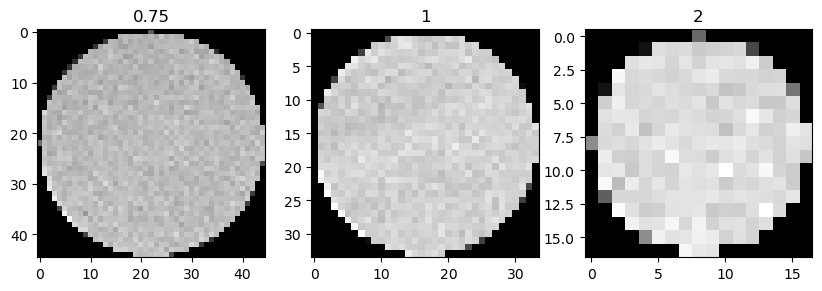

In [38]:
resampled_075 = ft.resample(dry_masked,new_spacing=[0.75,0.75,0.75])
resampled_1 = ft.resample(dry_masked,new_spacing=[1,1,1])
resampled_2 = ft.resample(dry_masked,new_spacing=[2,2,2])

fig,ax = plt.subplots(1,3,figsize=(10,10))

ax[0].imshow(resampled_075[:,:,10],cmap='gray')
ax[0].set_title('0.75')
ax[1].imshow(resampled_1[:,:,10],cmap='gray')
ax[1].set_title('1')
ax[2].imshow(resampled_2[:,:,10],cmap='gray')
ax[2].set_title('2')

plt.show()


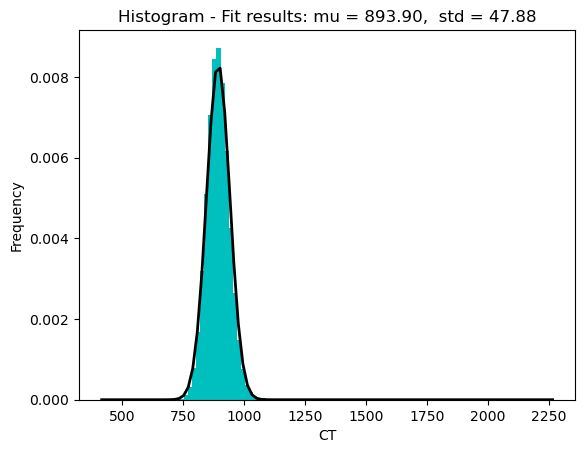

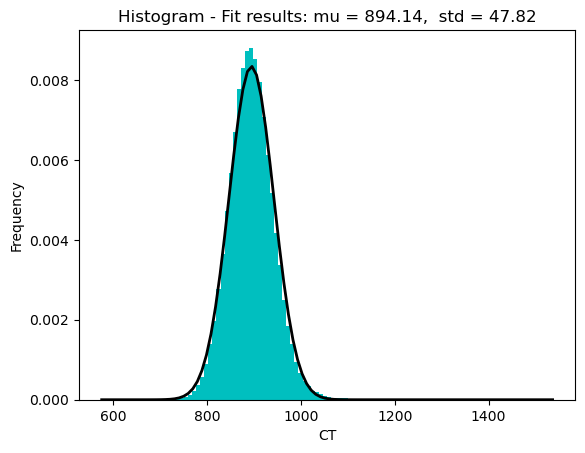

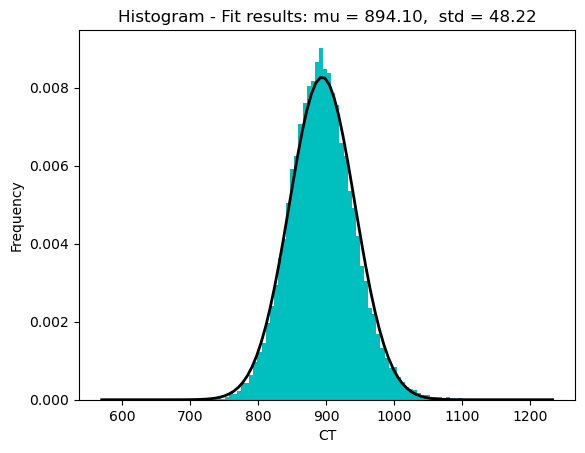

In [43]:
# Plot histograms for the coarsened slices
ft.histograms(resampled_075[resampled_075>500])
ft.histograms(resampled_1[resampled_1>500])
ft.histograms(resampled_2[resampled_2>600])


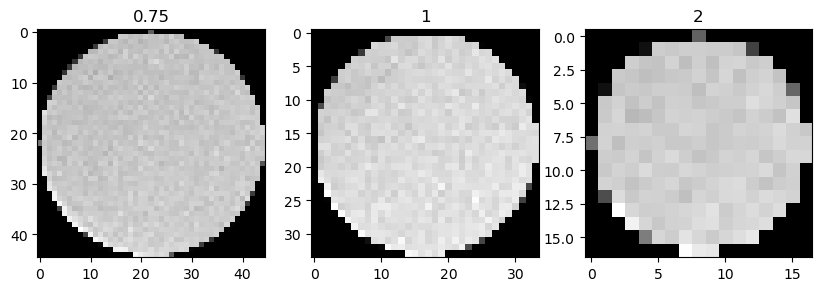

In [47]:
wresampled_075 = ft.resample(wet_masked,new_spacing=[0.75,0.75,0.75])
wresampled_1 = ft.resample(wet_masked,new_spacing=[1,1,1])
wresampled_2 = ft.resample(wet_masked,new_spacing=[2,2,2])

fig,ax = plt.subplots(1,3,figsize=(10,10))

ax[0].imshow(wresampled_075[:,:,10],cmap='gray')
ax[0].set_title('0.75')
ax[1].imshow(wresampled_1[:,:,10],cmap='gray')
ax[1].set_title('1')
ax[2].imshow(wresampled_2[:,:,10],cmap='gray')
ax[2].set_title('2')

plt.show()

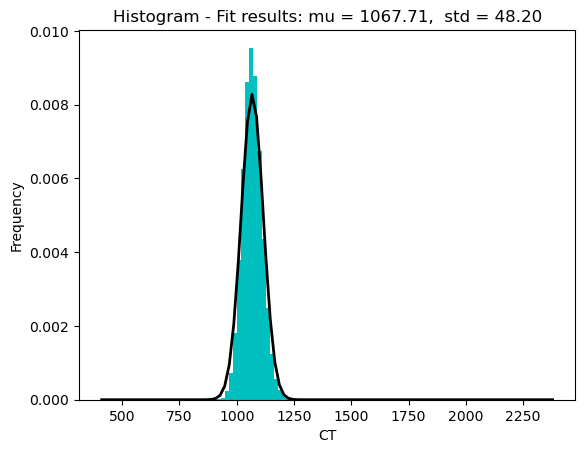

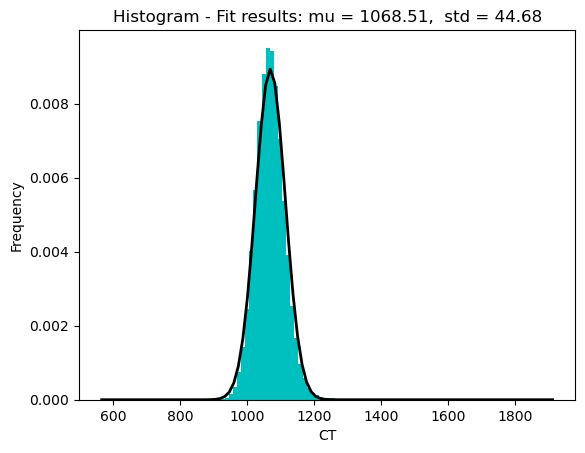

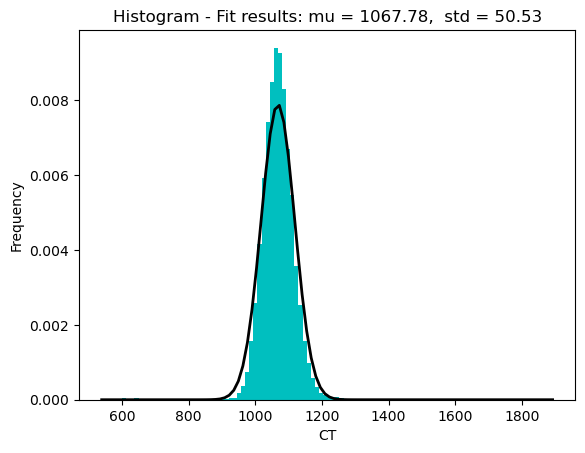

In [48]:
ft.histograms(wresampled_075[wresampled_075>500])
ft.histograms(wresampled_1[wresampled_1>500])
ft.histograms(wresampled_2[wresampled_2>600])

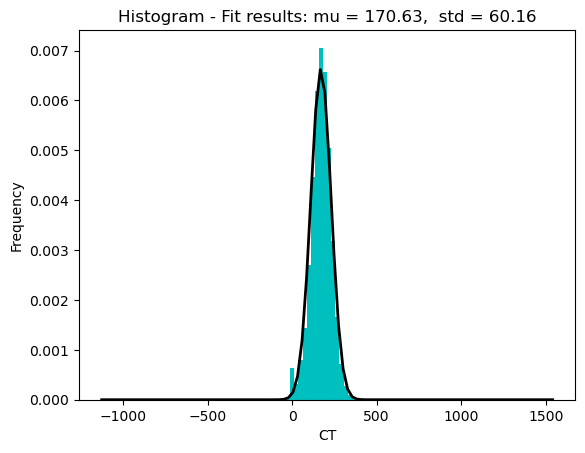

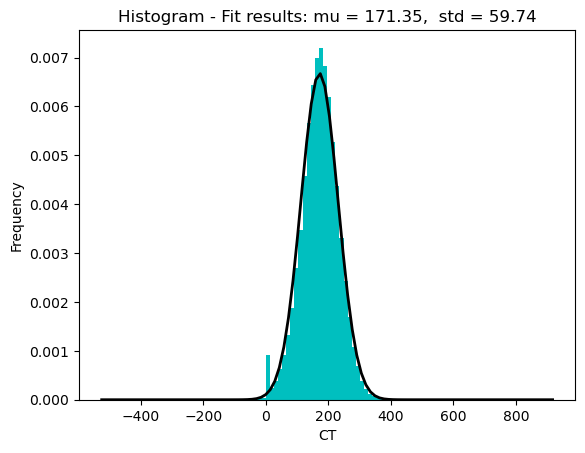

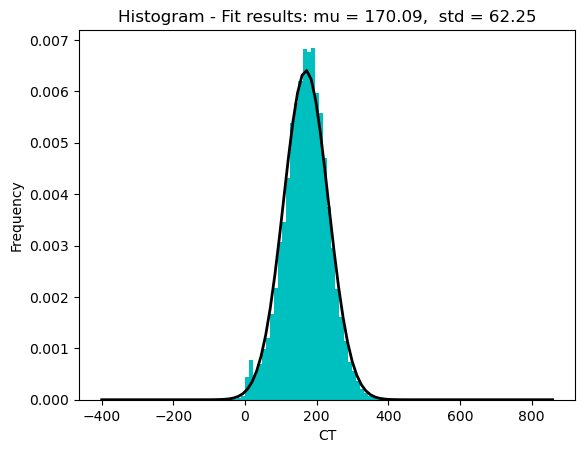

In [51]:
diff075 = wresampled_075 - resampled_075
diff1 = wresampled_1 - resampled_1
diff2 = wresampled_2 - resampled_2

ft.histograms(diff075)
ft.histograms(diff1)
ft.histograms(diff2)
